## Mean / median imputation with Scikit-learn ==> SimpleImputer

Scikit-learn provides a class to perform the most common data imputation techniques.

The **SimpleImputer** provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

### Advantages

- Simple to use if applied to the entire dataframe
- Maintained by the Scikit-learn developers: good quality code
- Fast computation (it uses numpy for calculations)
- Allows for grid search over the various imputation techniques
- Imputes several types of values (you can indicate if the missing values are np.nan, or zeroes, etc)

### Limitations

- Returns a numpy array instead of a pandas dataframe, inconvenient for data analysis
- Needs to use additional classes to select which features to impute  ==>
    - requires more lines of code
    - not so straightforward to use anymore.

### More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## In this demo:

We will do **mean / median imputation with Scikit-learn** using the Ames House Price Dataset.

- To download the dataset please refer to the lecture **Datasets** in **Section 1** of this course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the classes that we need to impute 
# missing data with sklearn:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [2]:
# We use only the following variables for the demo,
# 3 of which contain NA:

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
# let's load the House Prices dataset

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [4]:
# let's check the fraction of null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [5]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # just the features
    data['SalePrice'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0, # for reproducibility
)  

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [6]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer on the entire dataset

In [7]:
# Now we impute the missing values with SimpleImputer.

# Create an instance of the simple imputer.
# We indicate that we want to impute with the median.
imputer = SimpleImputer(strategy='median')

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='median')

**Note, if you want to do mean imputation instead of median, pass the argument 'mean' to 'strategy'**

In [8]:
# We can look at the learnt medians like this:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [9]:
# And we can investigate the medians directly to corroborate
# the imputer did a good job:
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

**Note** that SimpleImputer learns the medians of ALL the variables in the dataset, those with NA and those without NA.

In [10]:
# Now we impute the train and test sets.

# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [11]:
# If we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


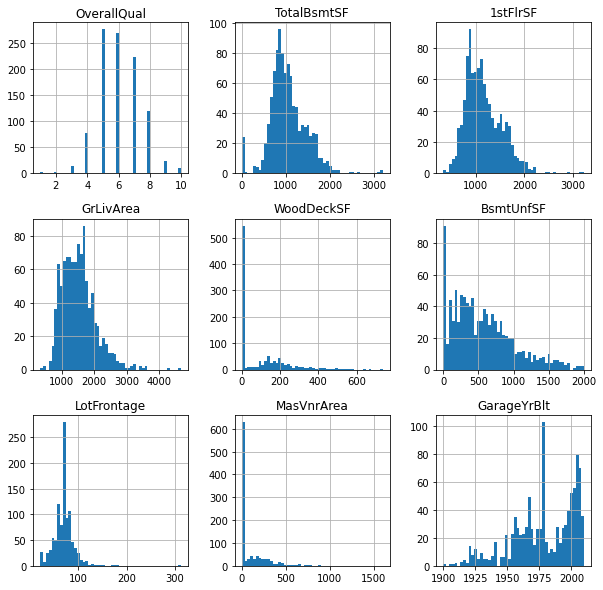

In [12]:
# Let's explore the change in the distributions after the median imputation

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

The tall bar at the value of the median in the histogram occurs after the data imputation in the variable LotFrontAge.

**A MASSIVE NOTE OF CAUTION**: when encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MISS-REPRESENTING the data!!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order in which they were in the X_train BEFORE the transformation!.


### SimpleImputer: different imputations for different features

Sometimes, we want to implement different imputation techniques to different features. How can we do this using the SimpleImputer?

We need to use another class called [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

In [13]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # predictors only
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [14]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

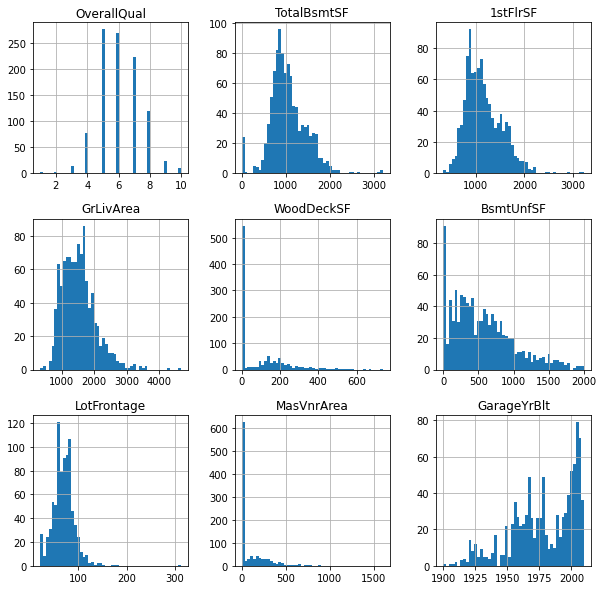

In [15]:
# let's look at the distributions of the variables to decide
# whether we use the mean or the median

X_train.hist(bins=50, figsize=(10,10))
plt.show()

For this demo, I will impute LotFrontage with the mean, and MasVnrArea and GarageYrBlt with the median, as those variables are quite skewed.

In [16]:
# First we need to make lists, indicating which features
# will be imputed with each method.

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

# Then we pass the features list and the transformers to
# the column transformer.

# We need to add remainder = True to indicate what we want
# ALL the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer.

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), numeric_features_mean),
    ('median_imputer', SimpleImputer(strategy='median'), numeric_features_median)
], remainder='passthrough')

In [17]:
# Now we fit the preprocessor:

preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [18]:
# We can explore the imputers like this:

preprocessor.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [19]:
# And we can look at the parameters learned 
# by the imptuers like this:

# for the mean imputer:
preprocessor.named_transformers_['mean_imputer'].statistics_

array([69.66866747])

In [20]:
# and we can corroborate the value with the one obtained
# manually from the train set.

X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [21]:
# The median imputer learned 2 median values
# because we wanted to impute 2 different variables.

preprocessor.named_transformers_['median_imputer'].statistics_

array([   0., 1979.])

In [22]:
# We corroborate those values in the train set:

X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [23]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)

# and check that it worked
np.mean(np.isnan(X_train))

0.0

In [24]:
# and now we can impute the test set
X_test = preprocessor.transform(X_test)

# and check that it worked
np.mean(np.isnan(X_test))

0.0

In [25]:
# remember that the returned data is a NumPy array:

X_train

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [26]:
# iIf we want to convertthe array into a dataframe, we need
# to be careful with the column order.

# We can explore the features used by each transformer
# including those in the remainder (the ones that were not transformed):

preprocessor.transformers_

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

We know that the first transformer imputed LotFrontage. That will be the first variable in the returned data.

The second transformer imputed MasVnrArea and GarageYrBuilt. Those will be the next variables.

'remainder', 'passthrough', contains the indices of the remaining variables: [0, 1, 2, 3, 4, 5]. The code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train.columns.

Those variables will be at the end of the resulting data.

In [27]:
# let's capture the columns in a list

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [28]:
# Convert array to dataframe:

pd.DataFrame(X_train,
             columns=numeric_features_mean+numeric_features_median+remainder_cols
            ).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.668667,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.668667,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.000000,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.000000,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.000000,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


**ANOTHER NOTE OF CAUTION**

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

- ColumnTransformer first creates a single column dataframe with the first feature, LotFrontage
- ColumnTransformer creates a 2 column dataframe with the features MasVnrArea and GarageBlt
- ColumnTransformer creates an additional dataframe with the remaining features in the train set
- The SimpleImputers learn the parameters in their respective sliced dataframes
- ColunmnTransformer contatenates back all the dataframes into the final result